In [9]:
from recommender import Recommender
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [10]:
def pca_visualize():
    # mark watched movies as red, convert movies to coordinates
    points_watched = []
    for movie in movies:
        # get index of the movie in original dataframe
        movie_index = df_original[df_original['Series_Title'] == movie].index[0]

        # get distances and indices of the closest neighbors, unsparse before reshape
        point = df_processed.iloc[movie_index, :].values
        # if point is sparse, convert to numpy array
        if isinstance(point, (pd.SparseArray, pd.SparseSeries)):
            point = point.to_numpy()
        point = point.reshape(1, -1)
        points_watched.append(point)

    avg = np.mean(points_watched, axis=0)

    # mark recommended movies as green, convert movies to coordinates
    points_recommended = []
    for movie in recommended_movies:
        # get index of the movie in original dataframe
        movie_index = df_original[df_original['Series_Title'] == movie].index[0]

        # get distances and indices of the closest neighbors, unsparse before reshape
        point = df_processed.iloc[movie_index, :].values
        # if point is sparse, convert to numpy array
        if isinstance(point, (pd.SparseArray, pd.SparseSeries)):
            point = point.to_numpy()
        point = point.reshape(1, -1)
        points_recommended.append(point)

    # create PCA instance
    pca = PCA(n_components=2)

    # fit PCA on the data
    pca.fit(df_processed)

    # transform data
    df_pca = pca.transform(df_processed)

    # create a scatter plot of the transformed data
    # set size of the plot to 10x10
    plt.figure(figsize=(12, 8))
    plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.2)
    for point, movie_title in zip(points_watched, movies):
        point_pca = pca.transform(point)
        plt.scatter(point_pca[:, 0], point_pca[:, 1], color='red')
        plt.text(point_pca[:, 0], point_pca[:, 1], movie_title, fontsize=8)

    for point, movie_title in zip(points_recommended, recommended_movies):
        point_pca = pca.transform(point)
        plt.scatter(point_pca[:, 0], point_pca[:, 1], color='green')
        plt.text(point_pca[:, 0], point_pca[:, 1], movie_title, fontsize=8)
    
    # avg as yellow
    avg_pca = pca.transform(avg)
    plt.scatter(avg_pca[:, 0], avg_pca[:, 1], color='yellow')
    plt.text(avg_pca[:, 0], avg_pca[:, 1], 'avg', fontsize=8)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    # plt.savefig('avg.svg', format='svg')
    plt.show()


In [11]:
df_original = pd.read_csv('./../data/data.csv')
# processed file load from pickle
df_processed = pd.read_pickle('./../data/df_processed.pkl')

Added movies due to avg:  []


,movie,distance
18,The Lord of the Rings: The Return of the King,0.264048
1,The Godfather: Part II,0.322229
19,The Dark Knight,0.325074
20,The Shawshank Redemption,0.329917
21,The Lord of the Rings: The Two Towers,0.332975
22,Pulp Fiction,0.339187
12,Inception,0.431681
6,Schindler's List,0.431874
15,The Dark Knight Rises,0.450255


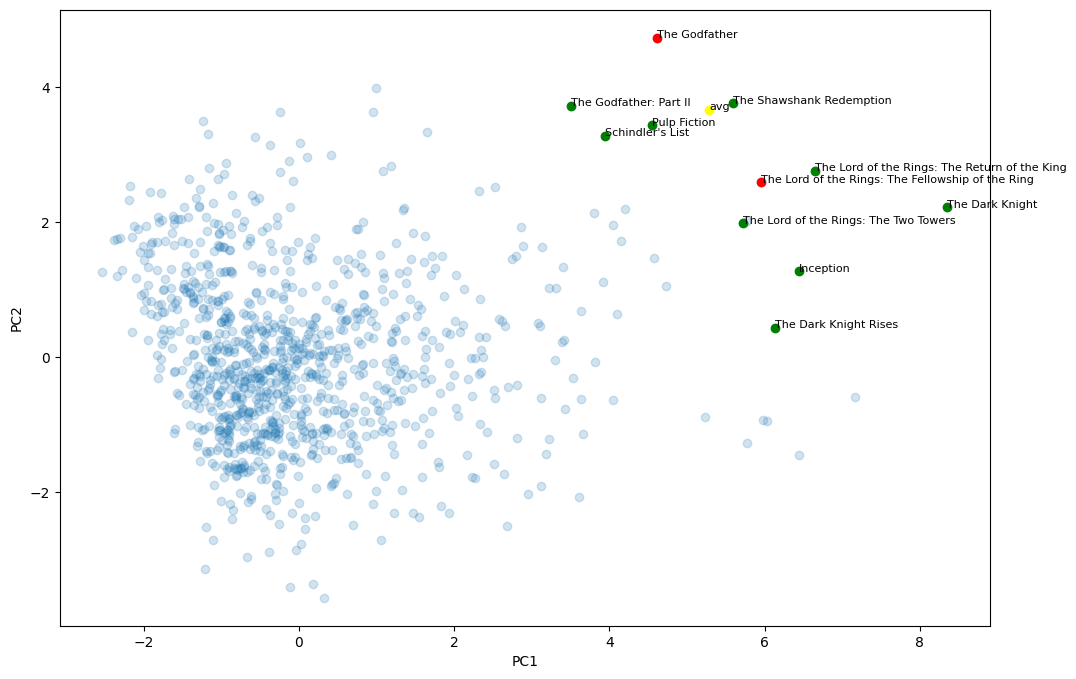

In [12]:
movies = ['The Godfather', 'The Lord of the Rings: The Fellowship of the Ring']
recommender = Recommender(df_processed, df_original, metric='cosine')
for movie in movies:
    recommender.add_movie(movie)

recommended = recommender.recommend(use_avg=False)
original_recommended_movies = recommended['movie'].tolist()

recommended = recommender.recommend(use_avg=True)
recommended_movies = recommended['movie'].tolist()

# get added movies due to avg
added_movies = list(set(recommended_movies) - set(original_recommended_movies))
print('Added movies due to avg: ', added_movies)

display(recommended)
pca_visualize()

Added movies due to avg:  []


,movie,distance
18,Star Wars: Episode VII - The Force Awakens,0.318148
19,Avengers: Infinity War,0.355874
20,The Dark Knight,0.355972
21,Avengers: Endgame,0.359027
22,The Lion King,0.367878
23,Avatar,0.374489
13,Titanic,0.417995
14,The Dark Knight Rises,0.421765
4,Deadpool,0.511331
5,WALL·E,0.514363


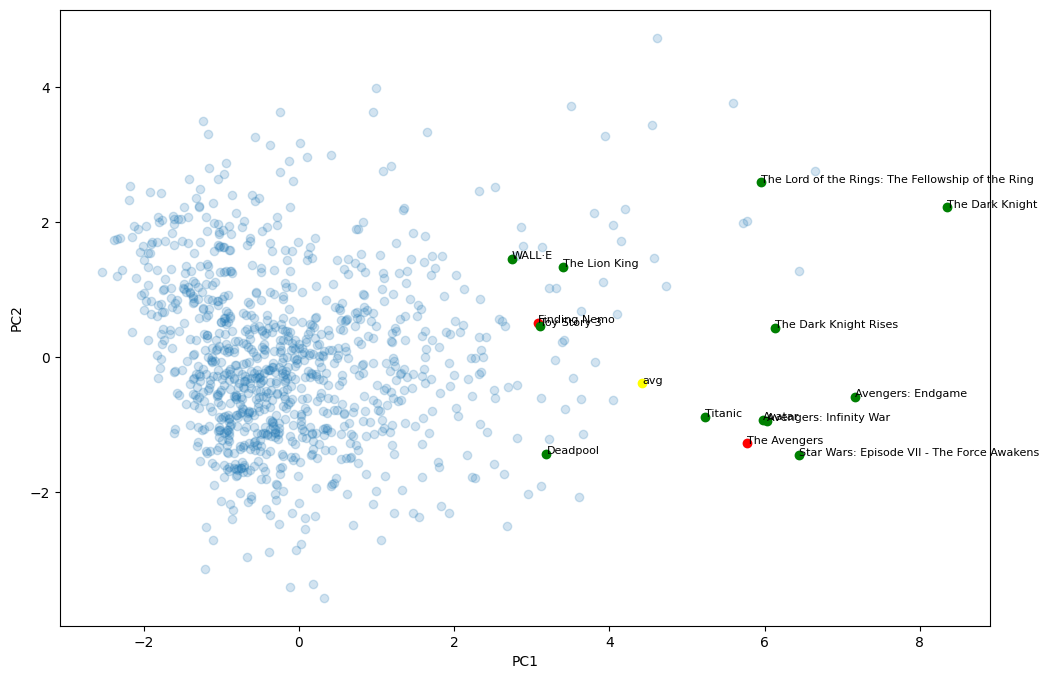

In [13]:
movies = ['Finding Nemo', 'The Avengers']
recommender = Recommender(df_processed, df_original, metric='cosine')
for movie in movies:
    recommender.add_movie(movie)

recommended = recommender.recommend(use_avg=False)
original_recommended_movies = recommended['movie'].tolist()

recommended = recommender.recommend(use_avg=True)
recommended_movies = recommended['movie'].tolist()

# get added movies due to avg
added_movies = list(set(recommended_movies) - set(original_recommended_movies))
print('Added movies due to avg: ', added_movies)

display(recommended)
pca_visualize()

Added movies due to avg:  ['E.T. the Extra-Terrestrial', 'Thor: Ragnarok']


,movie,distance
9,Star Wars: Episode VII - The Force Awakens,0.402726
10,Avatar,0.458164
11,The Avengers,0.458808
12,Avengers: Endgame,0.466254
13,Rogue One,0.475743
14,Avengers: Infinity War,0.480597
15,The Incredibles,0.495665
19,E.T. the Extra-Terrestrial,0.513909
1,8½,0.514468
2,The Ten Commandments,0.524228


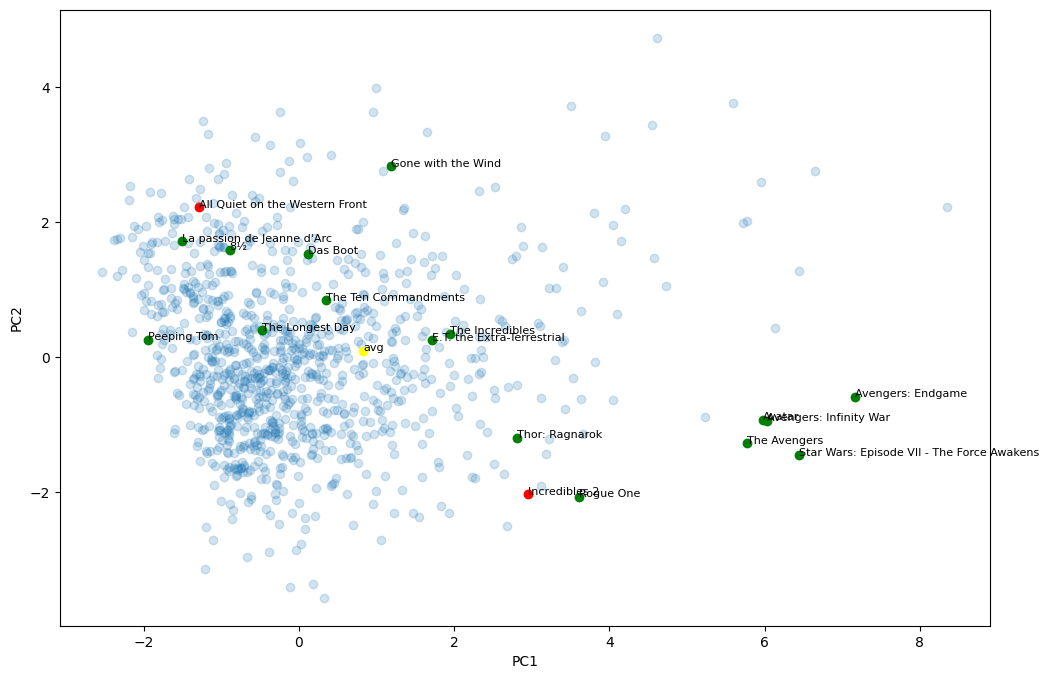

In [14]:
movies = ['All Quiet on the Western Front', 'Incredibles 2']
recommender = Recommender(df_processed, df_original, metric='cosine')
for movie in movies:
    recommender.add_movie(movie)

recommended = recommender.recommend(use_avg=False)
original_recommended_movies = recommended['movie'].tolist()

recommended = recommender.recommend(use_avg=True)
recommended_movies = recommended['movie'].tolist()

# get added movies due to avg
added_movies = list(set(recommended_movies) - set(original_recommended_movies))
print('Added movies due to avg: ', added_movies)

display(recommended)
pca_visualize()